# About Dataset
##### Data Science Job Salaries Dataset contains 23 columns, each are:
- Index: Just says the index order of the list of the songs.
- Highest Charting Position: Displays the highest positon an artist has gone on spotify.
- Number of Times Charted: The amount of times an artist has been charted within the top through the year 2021.
- Week of Highest Charting: Fow how many weeks an artist has gone while being among the top artist.
- Song Name: The anme of the song that placed that artist on the top on Spotify.
- Streams: Displays the number of times a song got streamed.
- Artist: The anem of the artist.
- Artist followers: Displays the number of followers a certain artist has.
- Song ID: The unique ID name of the song within the doamins of Spotify.
- Genre: This plays the genres of the song.
- Release Date: The date the song got released.
- Weeks Charted: Displays the amount of weeks a record appears on a hit-recording chart.
- Danceability: Measures how danceable is the song.
- Energy: Measures how energetic a song is.
- Loudness: Measures how loud a certaimn song is.
- Acousticness: Measures how acustic (relyant on intruments) a song is.
- Liveness: Measures how lively a song is.
- Tempo: Displays the tempo of the song
- Duration(ms): Displays the duration of the song.
- Valence: Displays the average rating of the song per individual.
- Chord: Displays which chord is predominant in the song.
###### but we added three new columns to match the 25 clumn requirement:
- Popularity: measured how popular was a song based of the difference between the streams (how many times the song got played) and the amount of followers the artist has.
- Joyfulness: Is the sum of the valence and danceability divided by the liveness of the song to get some reasoning on why the song is so joyful for the average listener.
- PLength: Dysplays the boolan of a song if it mathes the idea that a "perfect" popular song matches exactly 3 minutes and 30 seconds.

In [1]:
# Install and import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set
data=pd.read_csv('spotify_dataset.csv')
#visualize the top five rows in the data using the head function
data.head()

Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name   Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48633449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47248719   
2   2021-06-25--2021-07-02                           good 4 u  40162559   
3   2021-07-02--2021-07-09                         Bad Habits  37799456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33948454   

           Artist  Artist Followers                 Song ID  \
0        Måneskin         3377762.0  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI         2230022.0  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo         6266514.0  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran        83293380.0  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X         5473565.0  27NovPIUIRrOZoCHxABJwK   

                                    Genre  ... Danceability Energy  Loudness  \
0  ['indie rock italiano', 'italian pop']  ...          0.7    0.8     -4.81   
1                  ['australian hip hop']  ...          0.6    0.8     -5.48   
2                                 ['pop']  ...          0.6    0.7     -5.04   
3                       ['pop', 'uk pop']  ...          0.8    0.9     -3.71   
4           ['lgbtq+ hip hop', 'pop rap']  ...          0.7    0.7     -7.41   

   Speechiness  Acousticness  Liveness   Tempo  Duration(ms)  Valence  Chord  
0         0.05          0.13      0.36  134.00      211560.0     0.59      B  
1         0.05          0.04      0.10  169.93      141806.0     0.48  C#/Db  
2         0.15          0.34      0.08  166.93      178147.0     0.69      A  
3         0.03          0.05      0.36  126.03      231041.0     0.59      B  
4         0.06          0.02      0.05  150.00      212000.0     0.89  D#/Eb  

[5 rows x 23 columns]

## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   int64  
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [4]:
# add column about correlation between valence and danceability to see how joyful the song is 
data["Joyfulness"] = (data["Valence"] + data["Danceability"]) / data["Liveness"]

In [5]:
# stream - artist followers = new column to show how new a popular artist is.
data["Popularity"] = data["Streams"] - data["Artist Followers"]

In [6]:
data["PLength"] =  data["Duration(ms)"]<210000

In [7]:
data.shape

(1556, 25)

In [8]:
#Checking the null values in the data 
data.isna().sum().sort_values(ascending=False)

Popularity                   11
Speechiness                  11
Joyfulness                   11
Chord                        11
Valence                      11
Duration(ms)                 11
Tempo                        11
Artist Followers             11
Song ID                      11
Genre                        11
Release Date                 11
Liveness                     11
Acousticness                 11
Danceability                 11
Energy                       11
Loudness                     11
Index                         0
Highest Charting Position     0
Weeks Charted                 0
Artist                        0
Streams                       0
Song Name                     0
Week of Highest Charting      0
Number of Times Charted       0
PLength                       0
dtype: int64

In [9]:
# making new data frame with dropped NA values  
new_data = data.dropna(axis = 0, how = 'any')  

In [10]:
print("Old data frame length:", len(data)) 
print("New data frame length:", len(new_data))  
print("Number of rows with at least 1 NA value: ", 
      (len(data)-len(new_data)))

Old data frame length: 1556
New data frame length: 1545
Number of rows with at least 1 NA value:  11


In [11]:
# Understanding the Stastics in the data set
new_data.describe()

Index  Highest Charting Position  Number of Times Charted  \
count  1545.000000                1545.000000              1545.000000   
mean    779.135922                  87.825243                10.684142   
std     449.593861                  58.132046                16.389761   
min       1.000000                   1.000000                 1.000000   
25%     389.000000                  37.000000                 1.000000   
50%     780.000000                  80.000000                 4.000000   
75%    1169.000000                 137.000000                12.000000   
max    1556.000000                 200.000000               142.000000   

            Streams  Artist Followers    Popularity  Danceability  \
count  1.545000e+03      1.545000e+03  1.545000e+03   1545.000000   
mean   6.337136e+06      1.471690e+07 -8.379766e+06      0.696570   
std    3.375402e+06      1.667579e+07  1.666889e+07      0.144618   
min    4.176083e+06      4.883000e+03 -7.852399e+07      0.200000   
25%    4.915080e+06      2.123734e+06 -1.712046e+07      0.600000   
50%    5.269163e+06      6.852509e+06 -1.489556e+06      0.700000   
75%    6.452492e+06      2.269875e+07  3.526664e+06      0.800000   
max    4.863345e+07      8.333778e+07  4.525569e+07      1.000000   

            Energy     Loudness  Speechiness  Acousticness     Liveness  \
count  1545.000000  1545.000000  1545.000000   1545.000000  1545.000000   
mean      0.637994    -6.349036     0.123858      0.248841     0.181353   
std       0.163827     2.509481     0.110512      0.250551     0.144262   
min       0.100000   -25.170000     0.020000      0.000000     0.020000   
25%       0.500000    -7.490000     0.050000      0.050000     0.100000   
50%       0.600000    -5.990000     0.080000      0.160000     0.120000   
75%       0.800000    -4.710000     0.170000      0.390000     0.220000   
max       1.000000     1.510000     0.880000      0.990000     0.960000   

             Tempo   Duration(ms)      Valence   Joyfulness  
count  1545.000000    1545.000000  1545.000000  1545.000000  
mean    122.811502  197940.816828     0.515061     9.929576  
std      29.591024   47148.930420     0.227472     6.699911  
min      46.720000   30133.000000     0.030000     0.584906  
25%      97.960000  169266.000000     0.340000     5.181818  
50%     122.010000  193591.000000     0.510000     8.700000  
75%     143.860000  218902.000000     0.690000    12.900000  
max     205.270000  588139.000000     0.980000    70.500000

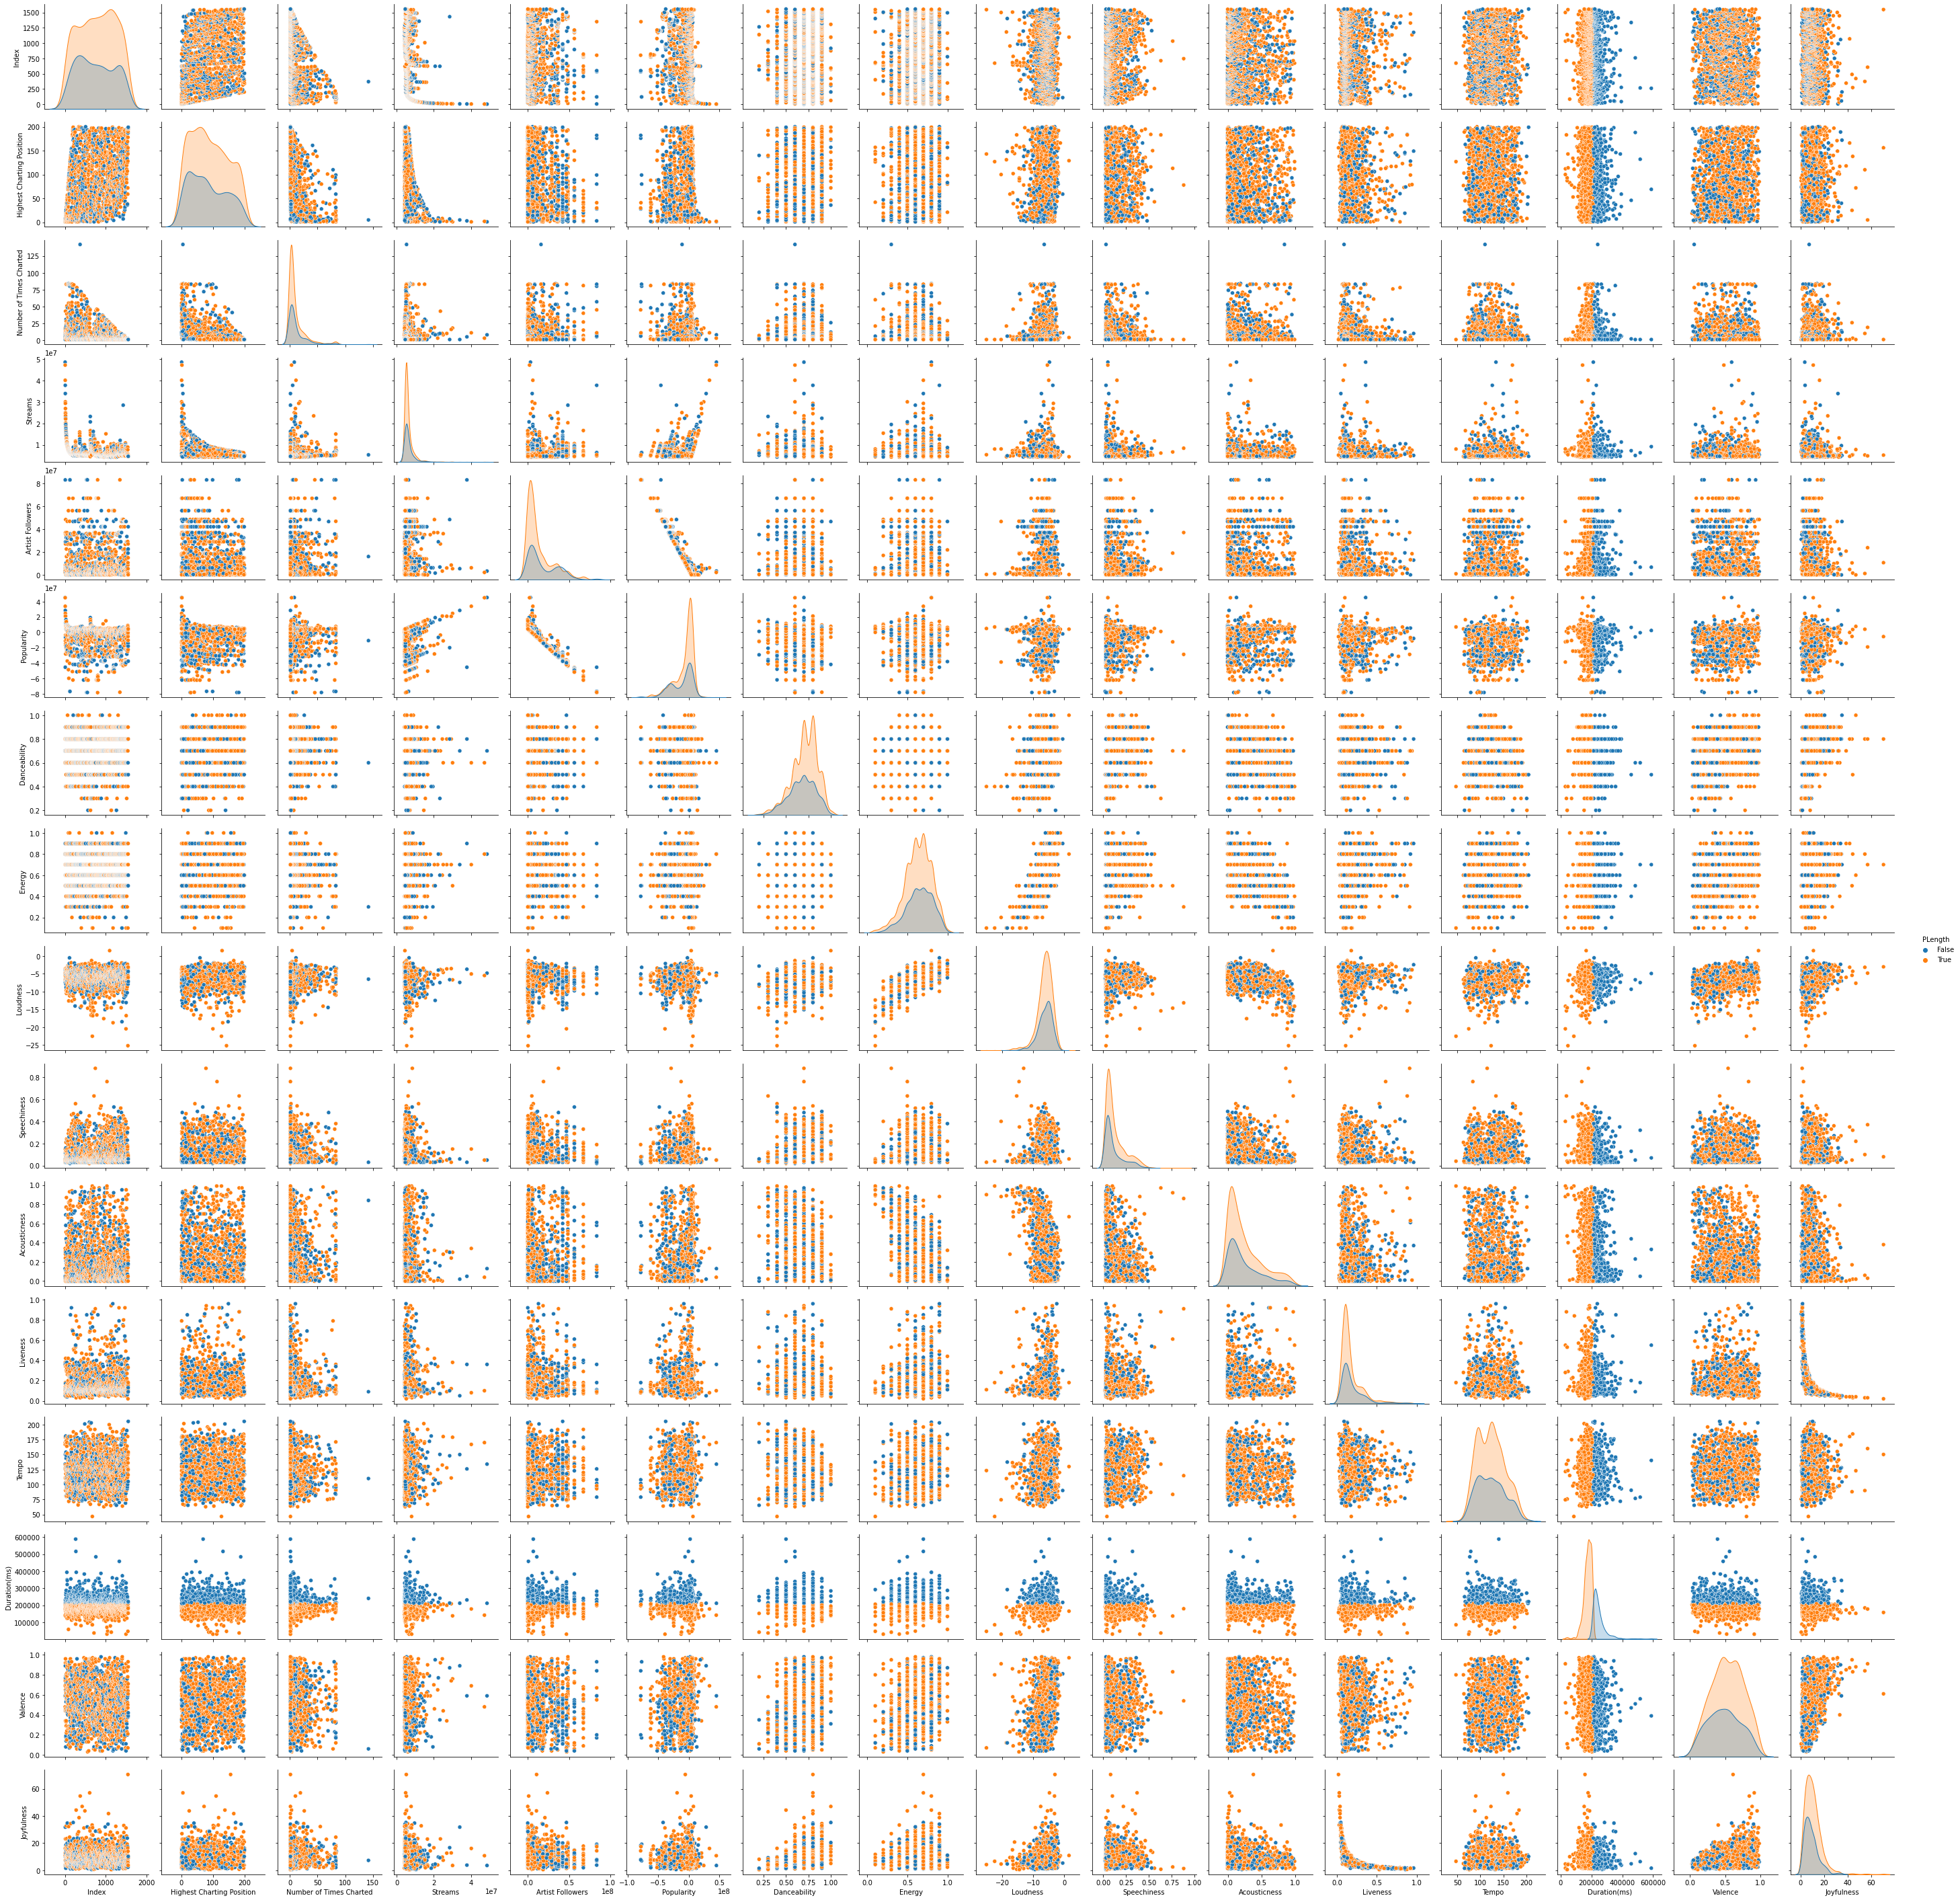

In [12]:
sns.pairplot(new_data, hue = 'PLength')
plt.show()

In [13]:
corr=new_data[['Streams','Duration(ms)', 'Liveness']].corr()
print(corr)

               Streams  Duration(ms)  Liveness
Streams       1.000000      0.015964  0.041395
Duration(ms)  0.015964      1.000000  0.018927
Liveness      0.041395      0.018927  1.000000


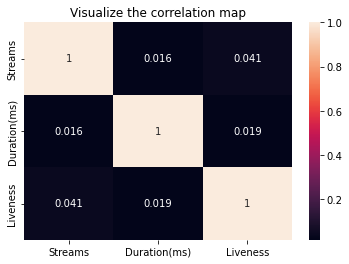

In [14]:
# Visualize the Correlation map

sns.heatmap(corr,annot=True)
plt.title("Visualize the correlation map")
plt.show()

#### Observations:
- In the Correlation map it's clearly understand that all columns have positive correlation
- Steams column weakest positive correlation with Duration (ms), while it has a fairly positive corrleation with Liveness.

# Explore Data Analysis (EDA Process)

### Identify the which song has most meets the perfect timing posted in the data

In [15]:
new_data['PLength'].value_counts()

True     1029
False     516
Name: PLength, dtype: int64

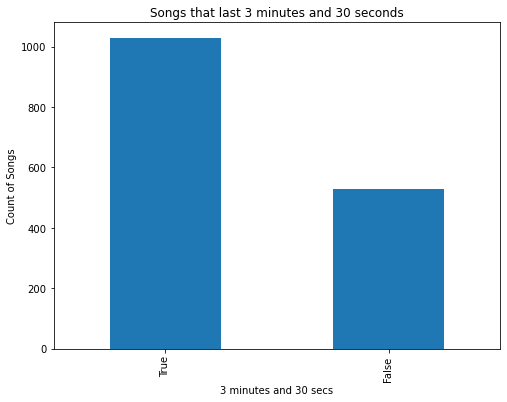

In [16]:
data['PLength'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Songs that last 3 minutes and 30 seconds")
plt.xlabel("3 minutes and 30 secs")
plt.ylabel("Count of Songs")
plt.show()

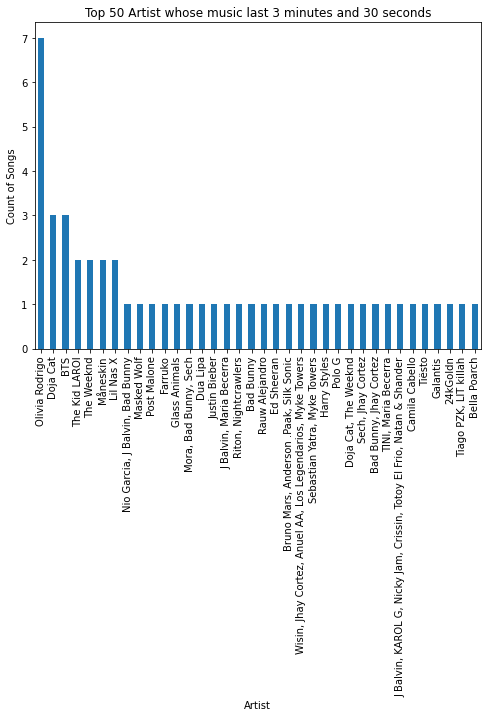

In [17]:
data['Artist'].head(50).value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Top 50 Artist whose music last 3 minutes and 30 seconds")
plt.xlabel("Artist")
plt.ylabel("Count of Songs")
plt.show()

### Identifying the top 50 artist that appear to meet the criteria in the data set using the pie chart

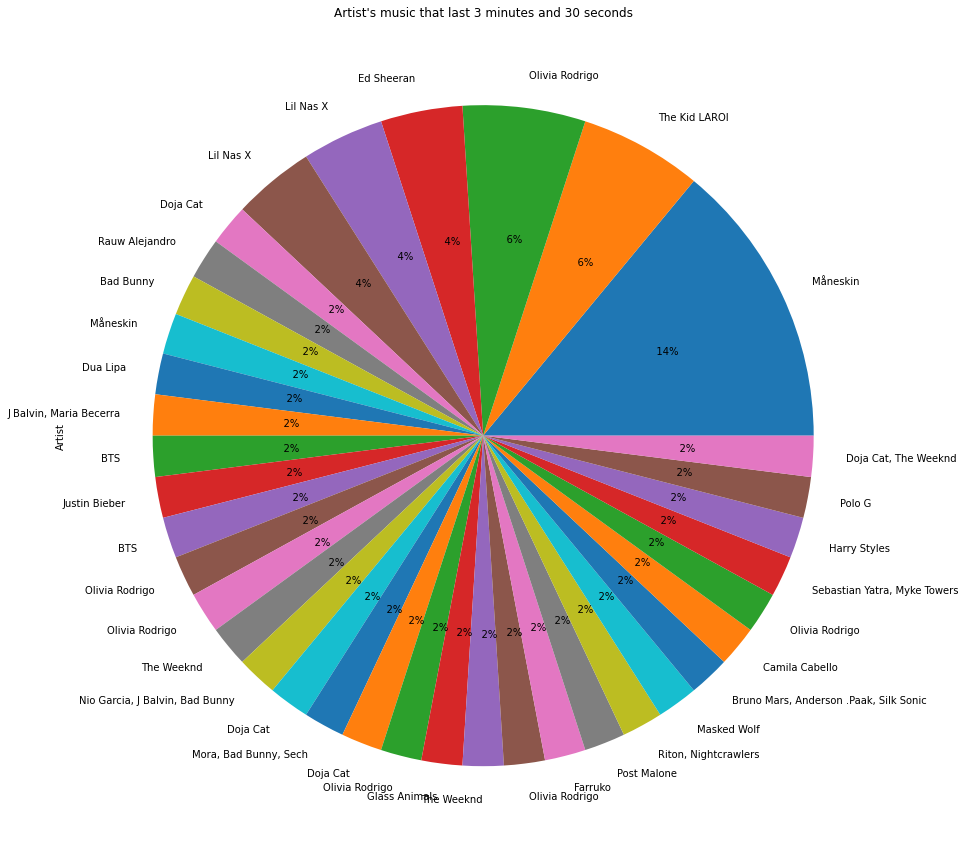

In [18]:
new_data['Artist'].head(50).value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(15,15.2),title="Artist's music that last 3 minutes and 30 seconds",
      labels=new_data['Artist'], autopct='%5.0f%%')
plt.show()

### Observations:
#### bar chart
In the year 2021 most of the songs released on spotify seemed to meet the criteria of lasting 3 minutes and 30 seconds, since a great mojority seems to follow this rule.
For the second graph it is noticeable that the top 50 artists all follow the perfect timming for thir songs.
#### Pie Chart
In the pie chart we observe most of the artists who follow the perfect length (at east once) for their music are also the most listened people on spotify.

### Histogram understanding how Joyful music is based of its Danceability

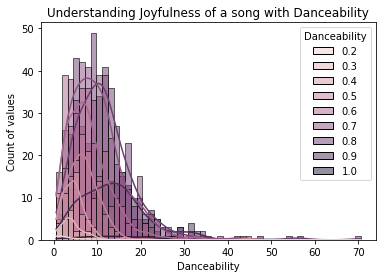

In [19]:
# Kernel density estimate (kde)
sns.histplot(data = new_data,x='Joyfulness',hue='Danceability',kde=True)
plt.title("Understanding Joyfulness of a song with Danceability")
plt.xlabel("Danceability")
plt.ylabel("Count of values")
plt.show()

In [ ]:
#sns.histplot(data=data,x='Genre',hue='Weeks Charted',kde=True)
#plt.title("Genre Popularity")
#plt.xlabel("Weeks Charted")
#plt.ylabel("Count of the values")
#plt.show()

In [20]:
unique_values_count = data['Artist'].nunique()
print("Number of unique values in 'Artist':", unique_values_count)

Number of unique values in 'Artist': 716


In [21]:
unique_values_count = data['Song Name'].nunique()
print("Number of unique values in 'Song Name':", unique_values_count)


Number of unique values in 'Song Name': 1556


In [22]:
data.corr()

Index  Highest Charting Position  \
Index                      1.000000                   0.254341   
Highest Charting Position  0.254341                   1.000000   
Number of Times Charted   -0.359693                  -0.417968   
Streams                   -0.260033                  -0.295801   
Artist Followers           0.090887                  -0.233723   
Popularity                -0.143319                   0.173994   
Danceability               0.123792                   0.008657   
Energy                    -0.009065                   0.065236   
Loudness                  -0.014314                   0.032145   
Speechiness                0.109239                   0.041459   
Acousticness              -0.064055                  -0.012736   
Liveness                   0.029204                   0.013614   
Tempo                      0.023620                   0.026232   
Duration(ms)              -0.023481                  -0.033956   
Valence                   -0.054861                   0.045396   
Joyfulness                -0.023596                  -0.000460   
PLength                    0.034551                   0.040770   

                           Number of Times Charted   Streams  \
Index                                    -0.359693 -0.260033   
Highest Charting Position                -0.417968 -0.295801   
Number of Times Charted                   1.000000 -0.061631   
Streams                                  -0.061631  1.000000   
Artist Followers                          0.027458  0.103251   
Popularity                               -0.039729  0.099203   
Danceability                              0.028288 -0.078828   
Energy                                   -0.063163  0.004105   
Loudness                                  0.031291 -0.031104   
Speechiness                              -0.059997 -0.062612   
Acousticness                              0.046457  0.034484   
Liveness                                 -0.058863  0.041395   
Tempo                                    -0.048308  0.053466   
Duration(ms)                              0.033980  0.015964   
Valence                                   0.021588  0.038197   
Joyfulness                                0.048277 -0.013433   
PLength                                  -0.035932 -0.040745   

                           Artist Followers  Popularity  Danceability  \
Index                              0.090887   -0.143319      0.123792   
Highest Charting Position         -0.233723    0.173994      0.008657   
Number of Times Charted            0.027458   -0.039729      0.028288   
Streams                            0.103251    0.099203     -0.078828   
Artist Followers                   1.000000   -0.979506     -0.090283   
Popularity                        -0.979506    1.000000      0.074358   
Danceability                      -0.090283    0.074358      1.000000   
Energy                            -0.063808    0.064666      0.135900   
Loudness                          -0.033253    0.026969      0.233054   
Speechiness                       -0.071865    0.059216      0.233967   
Acousticness                       0.023936   -0.016963     -0.305370   
Liveness                          -0.013752    0.022140     -0.114268   
Tempo                             -0.019880    0.030715     -0.042209   
Duration(ms)                       0.142145   -0.138971     -0.097740   
Valence                           -0.109033    0.116813      0.355503   
Joyfulness                        -0.035703    0.032998      0.370532   
PLength                           -0.140509    0.132505      0.104703   

                             Energy  Loudness  Speechiness  Acousticness  \
Index                     -0.009065 -0.014314     0.109239     -0.064055   
Highest Charting Position  0.065236  0.032145     0.041459     -0.012736   
Number of Times Charted   -0.063163  0.031291    -0.059997      0.046457   
Streams                    0.004105 -0.031104    -0.062612      0.034

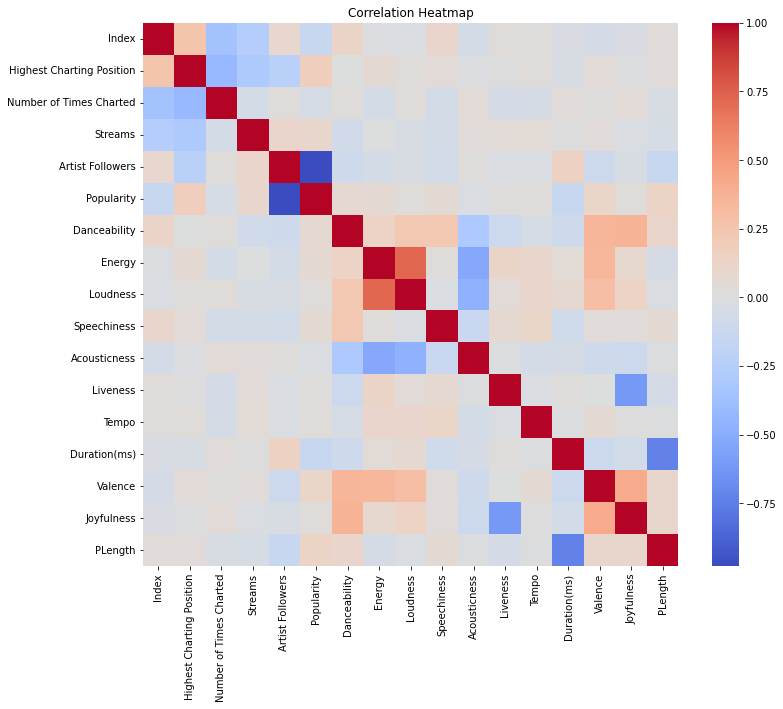

In [23]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()